In [1]:
import pandas as pd
from sklearn.datasets import load_wine # we use this as a proxy for chemical composition
# loading a dataset that represents chemical/elemental concentrations
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("Dataset Loaded: This contains chemical profiles similar to XRF results.")
df.head()

Dataset Loaded: This contains chemical profiles similar to XRF results.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<Figure size 800x600 with 0 Axes>

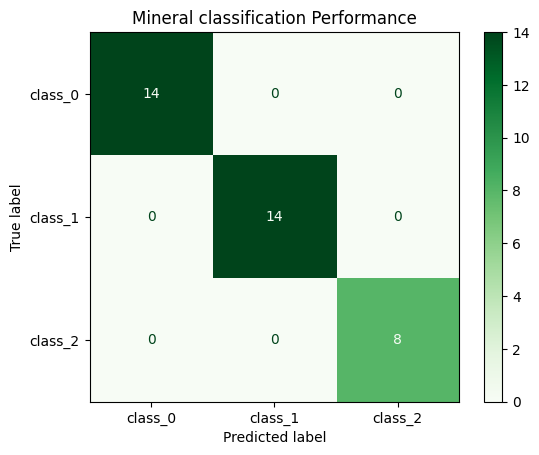

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [8]:
# 1. IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 2. LOAD DATA (Proxy for Chemical/Mineral Analysis)
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 3. PREPARE & SPLIT
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. TRAIN MODEL (Corrected parameter: n_estimators)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. VISUALIZE THE CONFUSION MATRIX
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Greens')
plt.title('Mineral classification Performance')
plt.show()

# 6. PRINT ACCURACY REPORT
print(classification_report(y_test, y_pred))

/tmp/ipython-input-4092405554.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


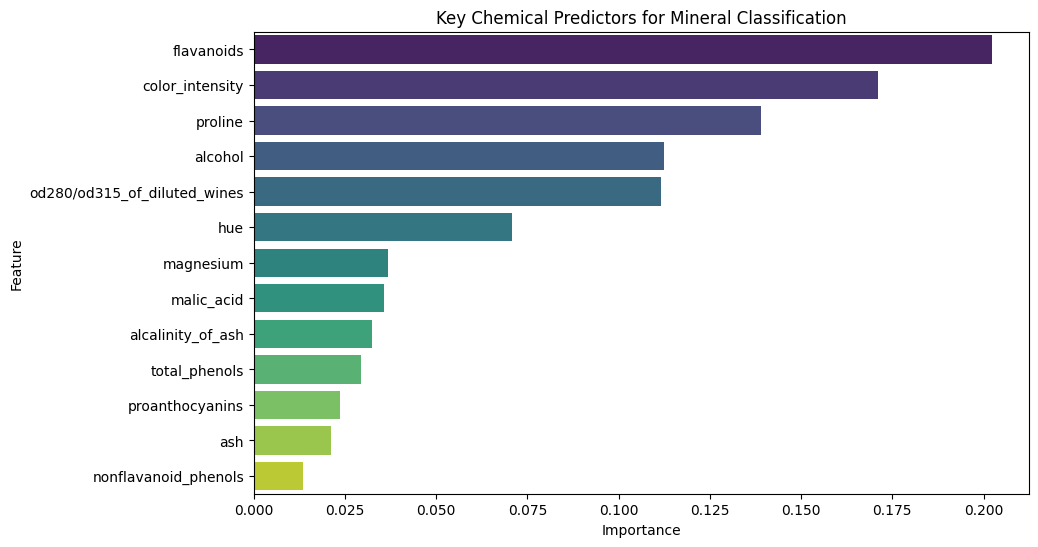

In [10]:
import seaborn as sns
# Calculate feature importance
importances = model.feature_importances_
feature_names = data.feature_names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Key Chemical Predictors for Mineral Classification')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [12]:
# Save your results to a CSV so you can 'show your work' in Excel/Power BI
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('Classification_Results.csv', index=False)

print("Project exported! You can now download 'Classification_Results.csv' from the Colab sidebar.")

Project exported! You can now download 'Classification_Results.csv' from the Colab sidebar.
